In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
df = pd.read_csv("F1-1950-2020-Race-Wins.csv")
df.head()


,GRAND PRIX,DATE,WINNER,CAR,LAPS,TIME
0,Great Britain,13-May-50,Nino Farina,ALFA ROMEO,70.0,13:23.6
1,Monaco,21-May-50,Juan Manuel Fangio,ALFA ROMEO,100.0,13:18.7
2,Indianapolis 500,30-May-50,Johnnie Parsons,KURTIS KRAFT OFFENHAUSER,138.0,46:56.0
3,Switzerland,04-Jun-50,Nino Farina,ALFA ROMEO,42.0,02:53.7
4,Belgium,18-Jun-50,Juan Manuel Fangio,ALFA ROMEO,35.0,47:26.0


In [2]:
# 🧹 Step 3: Clean the Data
df["DATE"] = pd.to_datetime(df["DATE"], format="%d-%b-%y")
df["YEAR"] = df["DATE"].dt.year
df["DECADE"] = (df["YEAR"] // 10 * 10).astype(str) + "s"


In [3]:
# 📊 Step 4: Calculate Wins per Driver per Decade
decade_wins = df.groupby(["DECADE", "WINNER"]).size().reset_index(name="WINS")
top5_by_decade = (
    decade_wins.sort_values(["DECADE", "WINS"], ascending=[True, False])
    .groupby("DECADE")
    .head(5)
    .reset_index(drop=True)
)
top5_by_decade


,DECADE,WINNER,WINS
0,1960s,Jackie Stewart,6
1,1960s,Jacky Ickx,2
2,1960s,Denny Hulme,1
3,1960s,Graham Hill,1
4,1960s,Jochen Rindt,1
5,1970s,Niki Lauda,17
6,1970s,Jackie Stewart,16
7,1970s,Emerson Fittipaldi,14
8,1970s,Mario Andretti,12
9,1970s,James Hunt,10


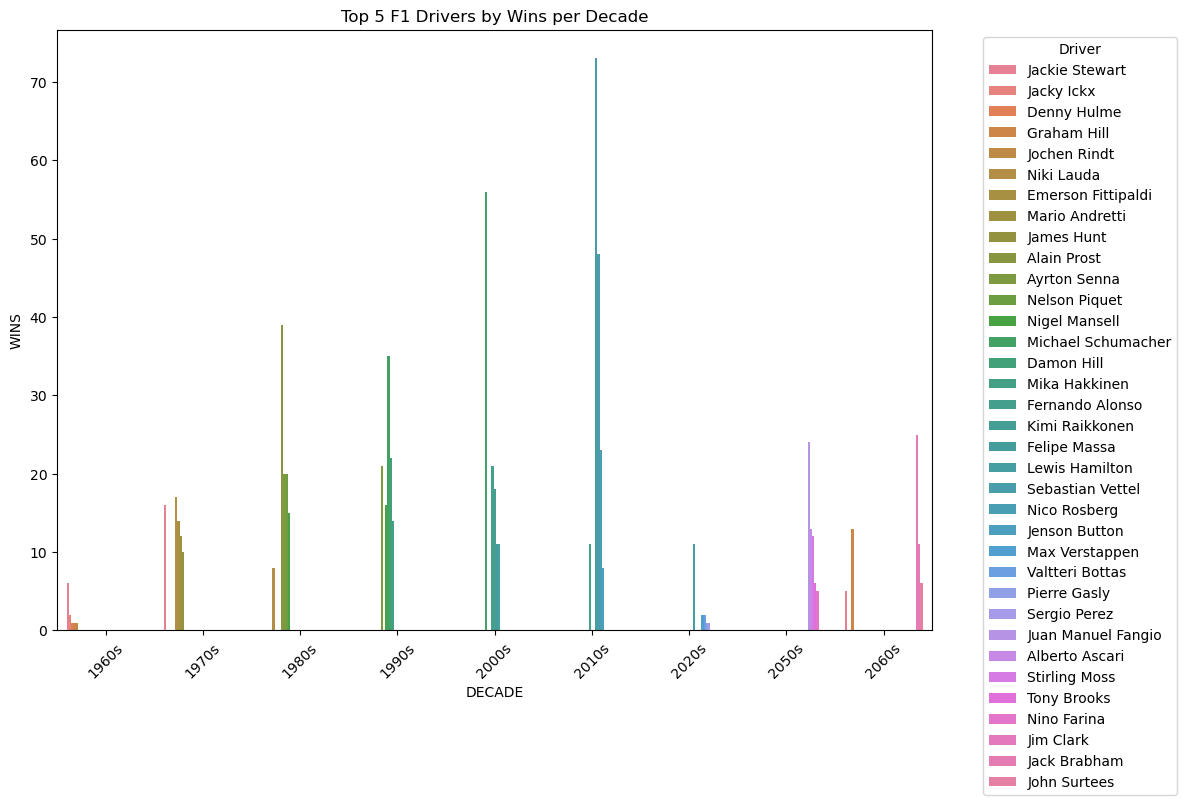

In [4]:
# 📈 Step 5: Plot Top Drivers by Decade
plt.figure(figsize=(12, 8))
sns.barplot(data=top5_by_decade, x="DECADE", y="WINS", hue="WINNER")
plt.title("Top 5 F1 Drivers by Wins per Decade")
plt.xticks(rotation=45)
plt.legend(title="Driver", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


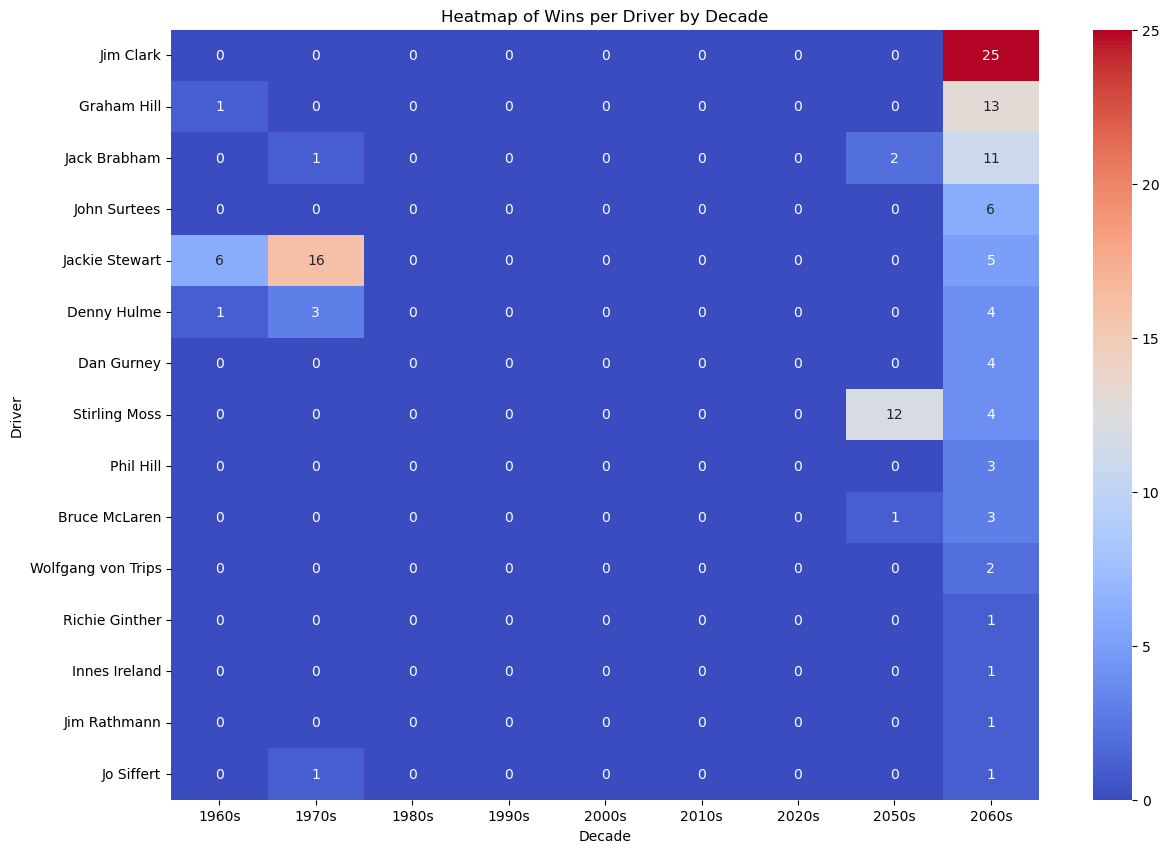

In [5]:
heatmap_data = decade_wins.pivot(index='WINNER', columns='DECADE', values='WINS').fillna(0)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data.sort_values(heatmap_data.columns[-1], ascending=False).head(15), annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Heatmap of Wins per Driver by Decade')
plt.ylabel('Driver')
plt.xlabel('Decade')
plt.show()


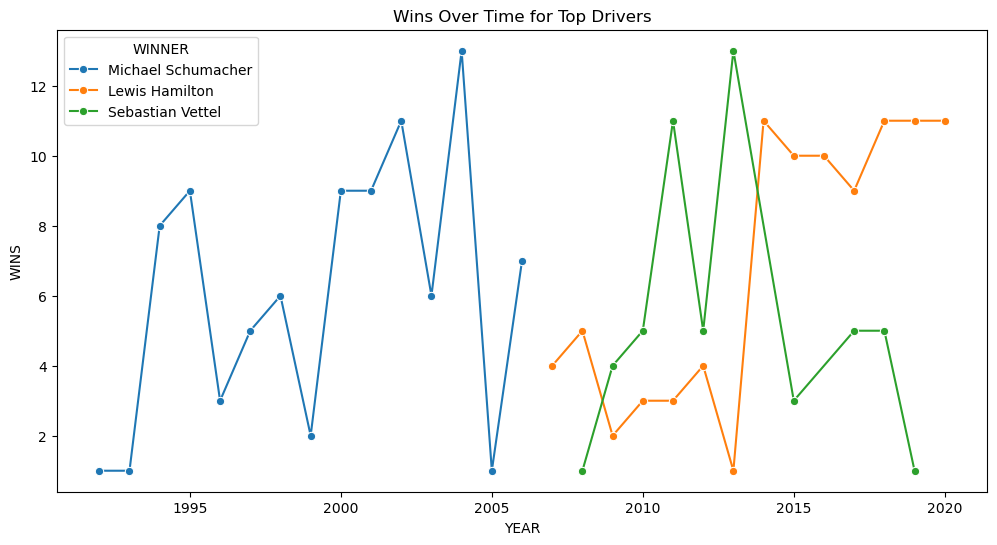

In [6]:
top_drivers = ["Lewis Hamilton", "Sebastian Vettel", "Michael Schumacher"]
df_top = df[df["WINNER"].isin(top_drivers)]
line_data = df_top.groupby(["YEAR", "WINNER"]).size().reset_index(name="WINS")
plt.figure(figsize=(12, 6))
sns.lineplot(data=line_data, x="YEAR", y="WINS", hue="WINNER", marker="o")
plt.title("Wins Over Time for Top Drivers")
plt.show()
